In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [45]:
def stock_stat(ticker):
    '''
        Determine the percent change in the closing values 
        of a stock over 1 month intervals. The argument 
        'ticker' requires a stock ticker of type string.
    '''
    tick = yf.Ticker(ticker)
    tick_history = tick.history(period = "max" , interval = "1mo").dropna()
    
    p_list = []
    for j in range(0,tick_history.shape[0]):
        if j == 0:
            pass
        else:
            profit = (tick_history["Close"].iloc[j] - tick_history["Close"].iloc[j-1])/tick_history["Close"].iloc[j-1]
            p_list.append(profit)
            
    p_df = pd.DataFrame(p_list) #Create a dataframe from the calulation
    
    fig , ax = plt.subplots(1,1,figsize = (15,10))
    ax.plot(p_df)
    ax.hlines(p_df.describe().iloc[4],0,len(p_list), color = 'r', label = 'Bottom 25%')
    ax.hlines(p_df.describe().iloc[5],0,len(p_list), color = 'y', label = 'Middle 50%')
    ax.hlines(p_df.describe().iloc[6],0,len(p_list), color = 'g', label = 'Top 75%')
    ax.hlines(0,0,len(p_list), label = '0%')
    ax.set_xlabel('Months')
    ax.set_ylabel('% Growth')
    ax.legend()
    ax.set_title("{} Monthly Performance".format(ticker))


        Determine the percent change in the closing values 
        of a stock over 1 month intervals. The argument 
        'ticker' requires a stock ticker of type string.
    


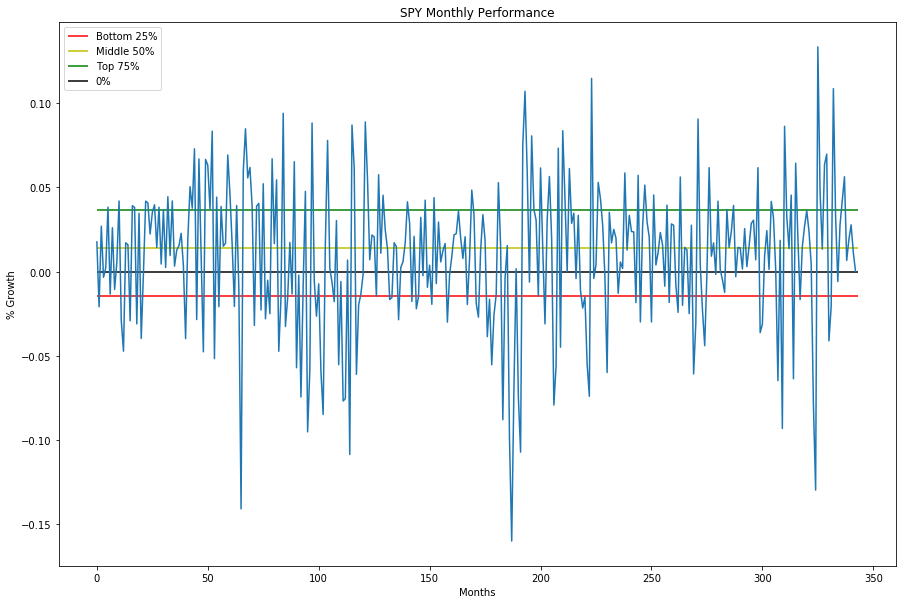

In [46]:
stock_stat("SPY")
print(stock_stat.__doc__)